Copyright (c) 2019 Computational-Medicine

# Diffusion MRI - Exploration

**Diffusion Imaging In Python**<br>

[DIPY](http://nipy.org/dipy) is a free and open source software project for computational neuroanatomy, focusing mainly on diffusion magnetic resonance imaging (dMRI) analysis. It implements a broad range of algorithms for denoising, registration, reconstruction, tracking, clustering, visualization, and statistical analysis of MRI data.

https://nipy.org/dipy/documentation.html#documentation

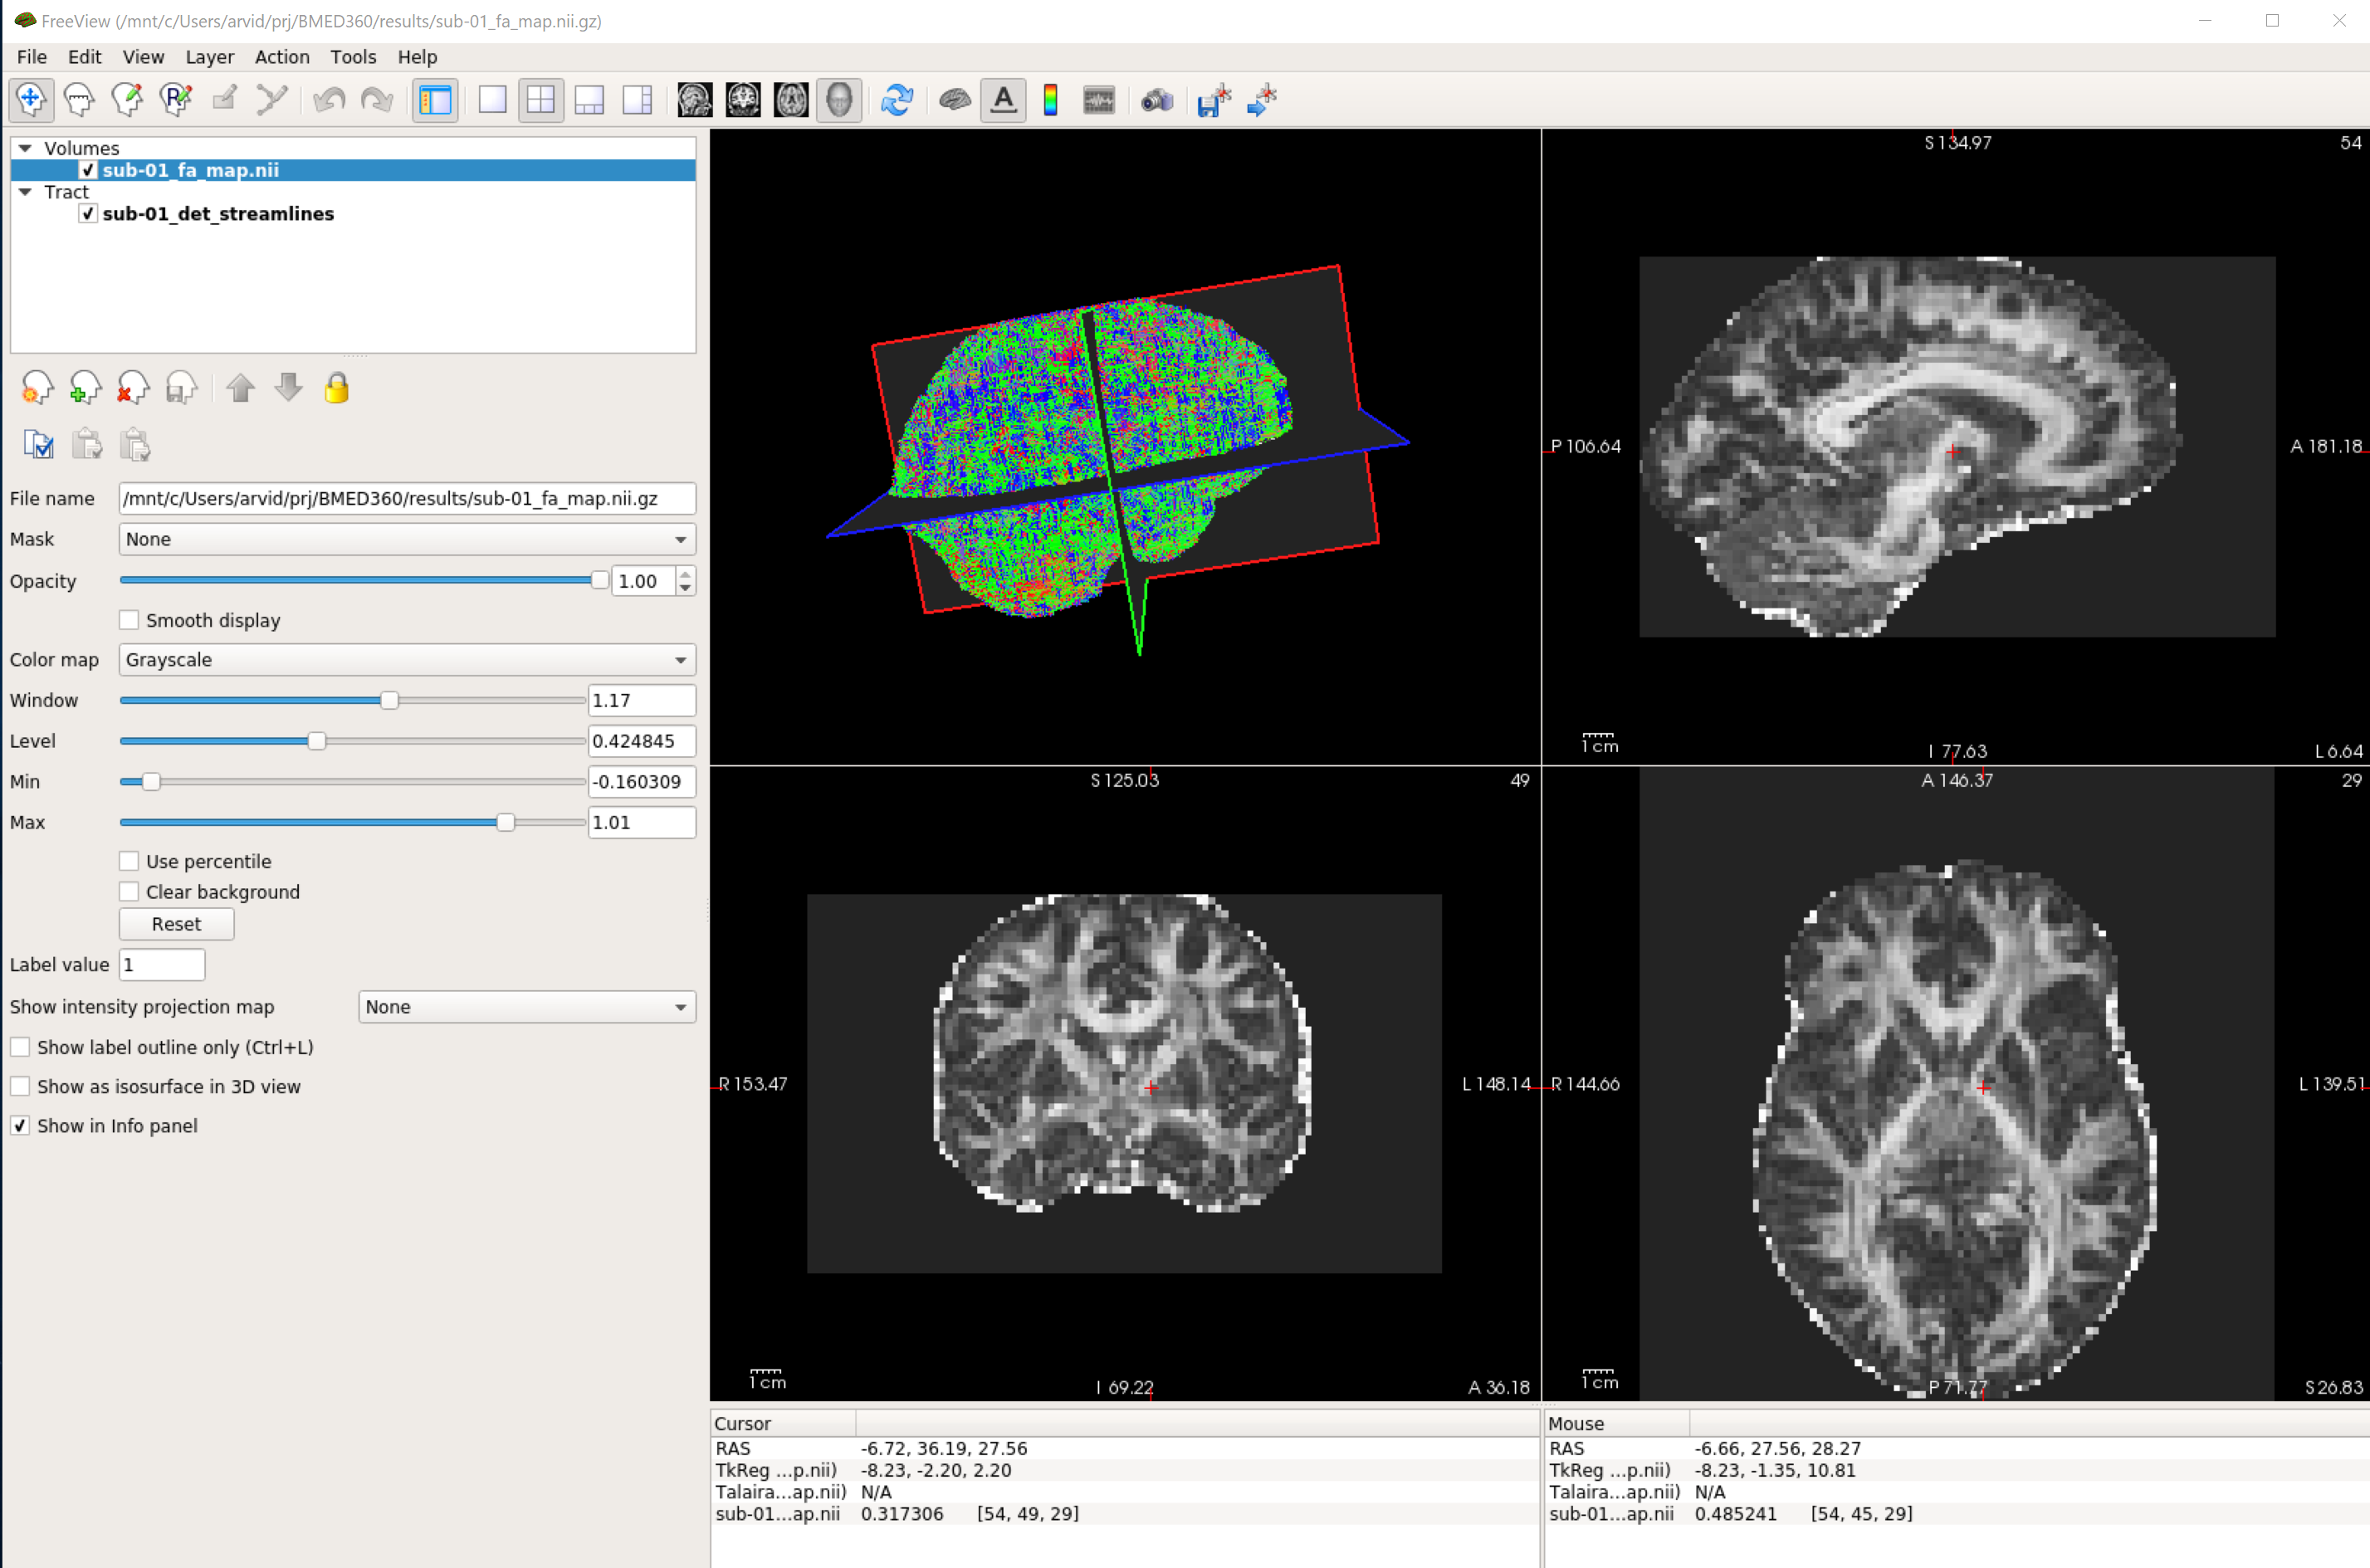

In [1]:
from IPython.display import Image
Image(filename= './assets/sub-01_dwi_dipy_fa_streamlines.png', width=800)

### Getting started

Here is a quick snippet showing how to calculate color FA also known as the DEC map. We use a Tensor model to reconstruct the datasets which are saved in a Nifti file along with the b-values and b-vectors which are saved as text files. Finally, we save our result as a Nifti file

In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home = os.path.expanduser('~')  # To make path to local home directory
# We assume you have made a directory ~/prj/BMED360/results
import nibabel as nib
from dipy.io.image import load_nifti, save_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
import dipy

print('nibabel version:', nib.__version__)
print('dipy version:', dipy.__version__)

nibabel version: 2.4.0
dipy version: 0.16.0


In [2]:
BIDSHOME = '../data/mri/mybids'
subj = 'sub-01'

fdwi = '%s/%s/dwi/%s_dwi.nii.gz' % (BIDSHOME, subj, subj )
fbval = '%s/%s/dwi/%s_dwi.bval' % (BIDSHOME, subj, subj )
fbvec = '%s/%s/dwi/%s_dwi.bvec' % (BIDSHOME, subj, subj )

data, affine = load_nifti(fdwi)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

tenmodel = TensorModel(gtab)
tenfit = tenmodel.fit(data)

In [3]:
results_folder = '%s/prj/BMED360/results' % (home)

save_nifti('%s/%s_dwi_colorfa.nii.gz' % (results_folder, subj), tenfit.color_fa, affine)

**Alternatively:**<br>
Let’s start first by loading the dMRI datasets. For this purpose, we use a python library called [nibabel](https://nipy.org/nibabel) which enables us to read and write neuroimaging-specific file formats.

In [6]:
img = nib.load(fdwi)
data = img.get_data()

`data` is a 4D array where the first 3 dimensions are the i, j, k voxel coordinates and the last dimension is the number of non-weighted (S0s) and diffusion-weighted volumes.

We can very easily check the size of `data` in the following way:

In [7]:
print(data.shape)

(100, 100, 60, 129)


C:\Users\arvid\Anaconda3\envs\bmed360\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  """Entry point for launching an IPython kernel.


We can also check the dimensions of each voxel in the following way:

In [7]:
print(img.header.get_zooms()[:3])

(2.2, 2.2, 2.2)


... and look at the corresponding affine matrix

In [12]:
print(img.affine)

[[-2.19293380e+00  8.67084715e-09  1.76185533e-01  1.06019615e+02]
 [-2.77641532e-03  2.19972682e+00 -3.45574021e-02 -7.04481506e+01]
 [ 1.76163644e-01  3.46687585e-02  2.19266152e+00 -4.71965027e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [13]:
affine

array([[-2.19293380e+00,  8.67084715e-09,  1.76185533e-01,
         1.06019615e+02],
       [-2.77641532e-03,  2.19972682e+00, -3.45574021e-02,
        -7.04481506e+01],
       [ 1.76163644e-01,  3.46687585e-02,  2.19266152e+00,
        -4.71965027e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

We can quickly visualize the results using matplotlib. For example, let’s show here the middle axial slices of volume 0 and volume 10.

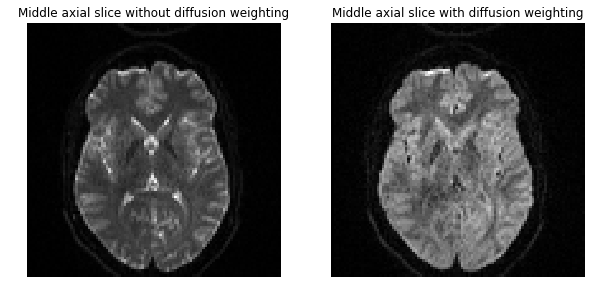

In [14]:
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets', figsize=(10, 5))
plt.subplot(1, 2, 1).set_axis_off()
plt.title('Middle axial slice without diffusion weighting')
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.title('Middle axial slice with diffusion weighting')
plt.savefig('%s/%s_dwi_0_10_mid.png' % (results_folder, subj), bbox_inches='tight')

In [15]:
gtab.bvals

array([   0.,  200.,  200.,  200.,  400.,  350.,  400.,  400.,  400.,
        350.,  550.,  550.,  550.,  550.,  750.,  750.,  750.,  950.,
        950.,  950.,  950.,  950.,  950.,  950.,  950.,  950.,  950.,
        950.,  950., 1100., 1100., 1150., 1100., 1100., 1150., 1150.,
       1100., 1100., 1150., 1100., 1100., 1500., 1500., 1500., 1500.,
       1500., 1500., 1700., 1700., 1700., 1700., 1700., 1700., 1700.,
       1700., 1700., 1700., 1700., 1700., 1700., 1700., 1700., 1850.,
       1850., 1900., 1850., 1900., 1850., 1850., 1900., 1900., 1850.,
       1850., 1850., 2050., 2050., 2050., 2050., 2050., 2050., 2050.,
       2050., 2050., 2050., 2050., 2050., 2250., 2250., 2250., 2250.,
       2450., 2450., 2450., 2400., 2450., 2450., 2450., 2450., 2450.,
       2400., 2450., 2450., 2600., 2600., 2600., 2600., 2650., 2600.,
       2600., 2650., 2600., 2600., 2600., 2600., 2600., 2600., 2600.,
       2600., 2650., 2600., 2600., 2650., 2600., 2600., 2600., 2600.,
       3000., 3000.,

The next step is to load the b-values and b-vectors from the disk using the function read_bvals_bvecs.

In DIPY, we use an object called `GradientTable` which holds all the acquisition specific parameters, e.g. b-values, b-vectors, timings and others. To create this object you can use the function `gradient_table`, and we can use gtab (the GradientTable object) to show some information about the acquisition parameters.

In [10]:
print(gtab.info)

B-values shape (129,)
         min 0.000000 
         max 3000.000000 
B-vectors shape (129, 3)
         min -1.000000 
         max 0.997159 
None


You can also see the b-values using:

In [11]:
print(gtab.bvals)

[   0.  200.  200.  200.  400.  350.  400.  400.  400.  350.  550.  550.
  550.  550.  750.  750.  750.  950.  950.  950.  950.  950.  950.  950.
  950.  950.  950.  950.  950. 1100. 1100. 1150. 1100. 1100. 1150. 1150.
 1100. 1100. 1150. 1100. 1100. 1500. 1500. 1500. 1500. 1500. 1500. 1700.
 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700.
 1700. 1700. 1850. 1850. 1900. 1850. 1900. 1850. 1850. 1900. 1900. 1850.
 1850. 1850. 2050. 2050. 2050. 2050. 2050. 2050. 2050. 2050. 2050. 2050.
 2050. 2050. 2250. 2250. 2250. 2250. 2450. 2450. 2450. 2400. 2450. 2450.
 2450. 2450. 2450. 2400. 2450. 2450. 2600. 2600. 2600. 2600. 2650. 2600.
 2600. 2650. 2600. 2600. 2600. 2600. 2600. 2600. 2600. 2600. 2650. 2600.
 2600. 2650. 2600. 2600. 2600. 2600. 3000. 3000. 3000.]


Or, for example the 10 first b-vectors using:

In [12]:
print(gtab.bvecs[:10, :])

[[ 0.00000e+00  0.00000e+00  0.00000e+00]
 [-2.00991e-06 -1.00000e+00 -2.49706e-05]
 [-7.46485e-02 -2.11623e-02 -9.96985e-01]
 [ 9.97159e-01 -1.06073e-02 -7.45820e-02]
 [-7.00890e-01 -7.10899e-01  5.81085e-02]
 [-7.63193e-01 -1.68344e-02 -6.45951e-01]
 [-5.33965e-02 -7.23716e-01 -6.88029e-01]
 [-5.51955e-02  7.01610e-01 -7.10420e-01]
 [ 7.02425e-01 -7.10657e-01 -3.95580e-02]
 [ 6.50275e-01 -1.68344e-02 -7.59512e-01]]


`gtab` can be used to tell what part of the data is the S0 volumes (volumes which correspond to b-values of 0).

In [16]:
S0s = data[:, :, :, gtab.b0s_mask]

Here, we had only 1 S0 as we can verify by looking at the dimensions of S0s

In [17]:
print(S0s.shape)

(100, 100, 60, 1)


We can save this in a new Nifti file

In [18]:
nib.save(nib.Nifti1Image(S0s, img.affine), '%s/%s_dwi_S0.nii.gz' % (results_folder, subj))

### Tracking

http://nipy.org/dipy/examples_built/tracking_quick_start.html#example-tracking-quick-start


In [19]:
from dipy.tracking.local import LocalTracking, ThresholdTissueClassifier
from dipy.tracking.utils import random_seeds_from_mask
from dipy.reconst.dti import TensorModel
from dipy.reconst.csdeconv import (ConstrainedSphericalDeconvModel,
                                   auto_response)
from dipy.direction import peaks_from_model
from dipy.data import fetch_stanford_hardi, read_stanford_hardi, get_sphere
from dipy.segment.mask import median_otsu
from dipy.viz import actor, window  # needs pip install fury
from dipy.io.image import save_nifti
from nibabel.streamlines import save as save_trk
from nibabel.streamlines import Tractogram
from dipy.tracking.streamline import Streamlines

Enables/disables interactive  - with VTK (`fury`)

In [30]:
interactive = True

Create a brain mask. This dataset is a bit difficult to segment with the default median_otsu parameters (see [Brain segmentation with median_otsu](http://nipy.org/dipy/examples_built/brain_extraction_dwi.html#example-brain-extraction-dwi)) therefore we use here more advanced options.

In [21]:
maskdata, mask = median_otsu(data, 3, 1, False,
                             vol_idx=range(10, 50), dilate=2)

For the Constrained Spherical Deconvolution we need to estimate the response function (see Reconstruction with [Constrained Spherical Deconvolution](http://nipy.org/dipy/examples_built/reconst_csd.html#example-reconst-csd)) and create a model.

In [22]:
response, ratio = auto_response(gtab, data, roi_radius=10, fa_thr=0.7)

csd_model = ConstrainedSphericalDeconvModel(gtab, response)

Next, we use peaks_from_model to fit the data and calculated the fiber directions in all voxels

In [23]:
sphere = get_sphere('symmetric724')

csd_peaks = peaks_from_model(model=csd_model,
                             data=data,
                             sphere=sphere,
                             mask=mask,
                             relative_peak_threshold=.5,
                             min_separation_angle=25,
                             parallel=True)

For the tracking part, we will use the fiber directions from the `csd_model` but stop tracking in areas where fractional anisotropy is low (< 0.1). To derive the FA, used here as a stopping criterion, we would need to fit a tensor model first. Here, we fit the tensor using weighted least squares (WLS).

In [25]:
tensor_model = TensorModel(gtab, fit_method='WLS')
tensor_fit = tensor_model.fit(data, mask)

fa = tensor_fit.fa

In [26]:
tensor_fit.trace

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In this simple example we can use FA to stop tracking. Here we stop tracking when FA < 0.1

In [27]:
tissue_classifier = ThresholdTissueClassifier(fa, 0.1)

Now, we need to set starting points for propagating each track. We call those seeds. Using `random_seeds_from_mask` we can select a specific number of seeds (`seeds_count`) in each voxel where the mask `fa > 0.3` is true.

In [28]:
seeds = random_seeds_from_mask(fa > 0.3, seeds_count=1)

For quality assurance we can also visualize a slice from the direction field which we will use as the basis to perform the tracking.

In [31]:
ren = window.Renderer()
ren.add(actor.peak_slicer(csd_peaks.peak_dirs,
                          csd_peaks.peak_values,
                          colors=None))

if interactive:
    window.show(ren, size=(900, 900))
else:
    window.record(ren, out_path='./assets/sub-01_dwi_csd_direction_field.png', size=(900, 900))

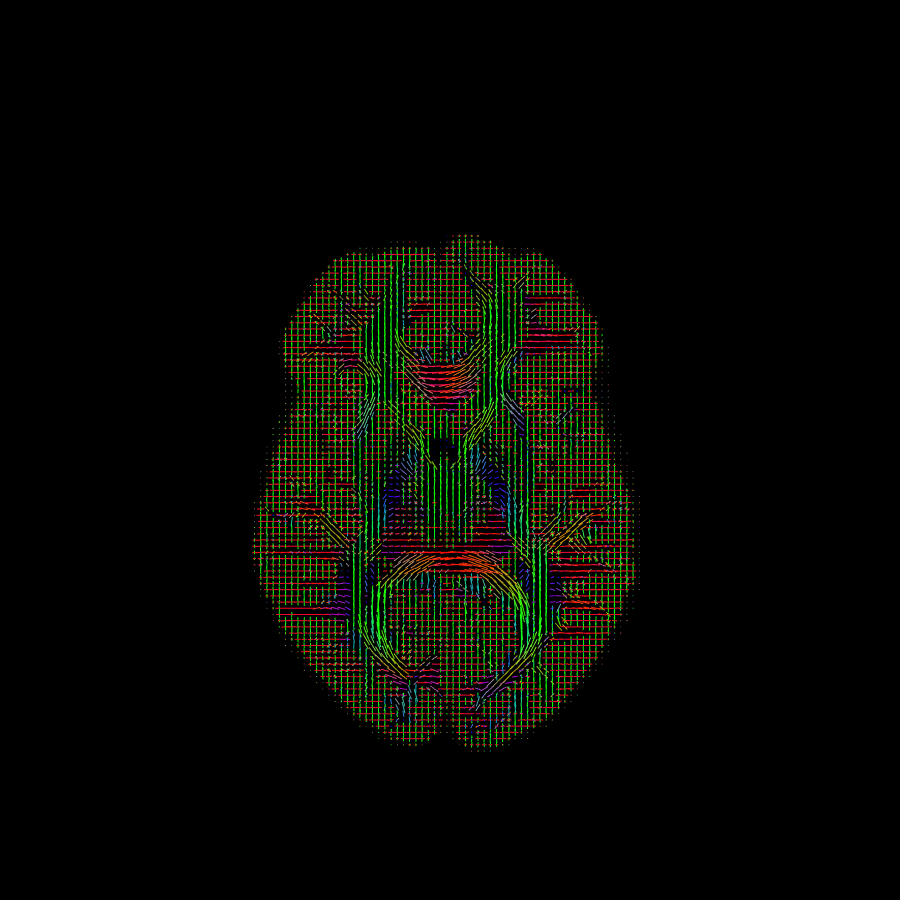

In [25]:
Image(filename= './assets/sub-01_dwi_csd_direction_field.png', width=600)

`EuDX` [Garyfallidis12] is a fast algorithm that we use here to generate streamlines. This algorithm is what is used here and the default option when providing the output of peaks directly in LocalTracking.

In [32]:
streamline_generator = LocalTracking(csd_peaks, tissue_classifier,
                                     seeds, affine=np.eye(4),
                                     step_size=0.5)

streamlines = Streamlines(streamline_generator)

The total number of streamlines is shown below.

In [33]:
print(len(streamlines))

137315


To increase the number of streamlines you can change the parameter `seeds_count in random_seeds_from_mask`.

We can visualize the streamlines using `actor.line` or `actor.streamtube`.

In [34]:
ren.clear()
ren.add(actor.line(streamlines))

if interactive:
    window.show(ren, size=(900, 900))
else:
    print('Saving illustration as sub-01_dwi_det_streamlines.png')
    window.record(ren, out_path='./assets/sub-01_dwi_det_streamlines.png', size=(900, 900))

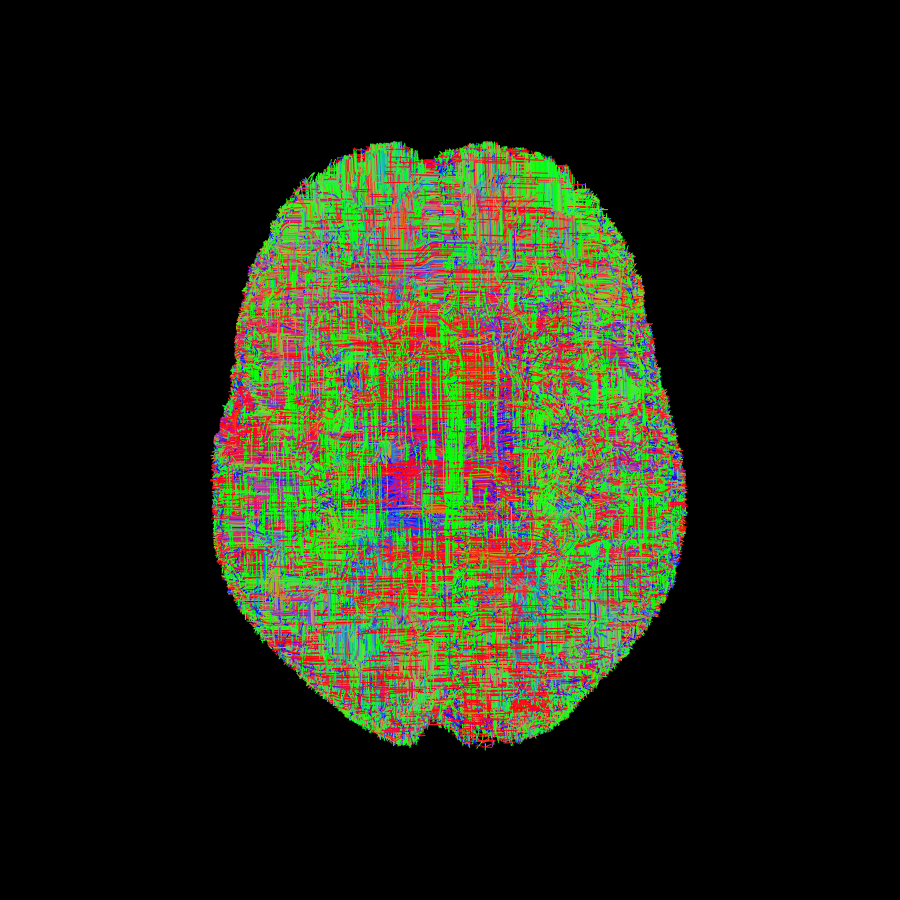

In [29]:
Image(filename= './assets/sub-01_dwi_det_streamlines.png', width=600)

To learn more about this process you could start playing with the number of seed points or, even better, specify seeds to be in specific regions of interest in the brain.

Save the resulting streamlines in a Trackvis (.trk) format and FA as Nifti (.nii.gz).

In [30]:
save_trk(Tractogram(streamlines, affine_to_rasmm=img.affine),
         '%s/%s_dwi_det_streamlines.trk' % (results_folder, subj))

save_nifti('%s/%s_dwi_fa_map.nii.gz' % (results_folder, subj), fa, img.affine)

**References**

[Garyfallidis12]	(1, 2) [Garyfallidis E.](http://garyfallidis.github.io), “Towards an accurate brain tractography”, PhD thesis, University of Cambridge, 2012.  [PDF](https://drive.google.com/file/d/1uqq9m-dqs8OK4qyfmzcStTnPJUSuLv--/view?usp=sharing)<br>
[Tournier07]	J-D. Tournier, F. Calamante and A. Connelly, “[Robust determination of the fibre orientation distribution in diffusion MRI: Non-negativity constrained super-resolved spherical deconvolution](https://www.sciencedirect.com/science/article/pii/S1053811907001243)”, Neuroimage, vol. 35, no. 4, pp. 1459-1472, 2007.

**Exploring further?**   

Check http://nipy.org/dipy/examples_index.html  and the [FAQ](http://nipy.org/dipy/faq.html)